In [ ]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
filename_df = pd.read_csv("/content/Data Rumah Sakit di Surakarta - Sheet2.csv")
filename_df.head()

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS
0,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,ICU,NaN,31,0
1,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,VVIP/Super VIP,NaN,4,0
2,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,VIP,NaN,52,0
3,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,Kelas I,"Ruang ANGGREK III - PALIATIF CARE, ANGGREK III...",61,0
4,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.55854,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,Kelas II,"Ruang ANGGREK III - PALIATIF CARE, ANGGREK III...",62,0


In [ ]:
filename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kode Rumah Sakit  104 non-null    float64
 1   Nama Rumah Sakit  105 non-null    object 
 2   Tipe              105 non-null    object 
 3   Alamat            105 non-null    object 
 4   Latitude          105 non-null    float64
 5   Longitude         105 non-null    float64
 6   Telepon           105 non-null    object 
 7   Email             73 non-null     object 
 8   Kelas             105 non-null    object 
 9   Kamar             34 non-null     object 
 10  Jumlah Bed        105 non-null    int64  
 11  BPJS              105 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 10.0+ KB


In [ ]:
filename_df.shape

(105, 12)

In [ ]:
filename_drop = filename_df.drop_duplicates(['Nama Rumah Sakit'], keep = 'first')
filename_drop

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS
0,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.558540,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,ICU,NaN,31,0
6,3372026.0,RS Umum Dr. Oen,B,"Jl. Brigjend Katamso 55, Surakarta",-7.555617,110.837808,0271-643139,info@droenska.com,ICU,NaN,18,0
12,3372096.0,RS Umum PKU Muhammadiyah Surakarta,B,"Jl. Ronggowarsito 130, Surakarta",-7.565419,110.816600,0271-714578,humas_pkusolo@yahoo.co.id,ICU,NaN,11,0
18,3372165.0,RS Umum Kasih Ibu,B,"Jl. Slamet Riyadi 404, Surakarta",-7.563000,110.801754,0271-714422,rsukasihibu@yahoo.com,ICU,NaN,12,0
24,3372041.0,RS Umum Brayat Minulya,C,Jl. Dr. Setiabudi No. 106 Surakarta,-7.552676,110.814287,0271-716646,rsbmslo@indosat.id,ICU,NaN,4,0
30,3372132.0,RS Umum Islam Kustati,C,Jl. Kapt. Mulyadi No.249,-7.580900,110.830900,0271-643013,rsuikustati@yahoo.com,ICU,NaN,7,0
35,3372030.0,RS Umum Tk IV Slamet Riyadi Surakarta,C,"Jl. Slamet Riyadi 321, Surakarta",-7.565822,110.805288,0271-714656,rstslametriyadisolo@yahoo.co.id,ICU,NaN,10,0
41,3372236.0,RS Umum Hermina Solo,C,JL. Kolonel Sutarto No. 16 Jebres Surakarta,-7.560000,110.840194,0271-638989,solo@herminahospitalgroup.com,ICU,NaN,8,0
46,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.556400,110.863300,0271-641442,rsjd_surakarta@yahoo.com,ICU,NaN,4,0
51,3372074.0,RS Umum Panti Waluyo,C,Jl. Jend A Yani No.1,-7.559800,110.791100,0271-712077,rspantiwaluyo@gmail.com,ICU,NaN,4,0


In [ ]:
best_rs = filename_drop.sort_values(by=['Tipe', 'BPJS'], ascending = False)
best_rs

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS
62,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.557600,110.825000,0271-656903,triharsi.solo@gmail.com,ICU,NaN,4,0
68,3372238.0,RS PKU Muhammadiyah Sampangan Surakarta,D,Semanggi RT 002 RW 020 Pasar Kliwon,-7.581668,110.836446,0271-633894,-,ICU,NaN,4,0
95,3372201.0,RS Umum Pusat Surakarta,D,"Jl. Profesor Dr. Soeharso No.28, Jajar, Kec. L...",-7.554472,110.787051,0271-720002,rsupsurakarta@kemkes.go.id,ICU,NaN,8,0
73,3372239.0,RS Gigi dan Mulut Soelastri,C,Jl. Brigjen Slamet Riyadi No. 366 Surakarta 57141,-7.565111,110.806852,0271-7467796,NaN,ICU,NaN,1,1
79,3372241.0,RS JIH Solo,C,Jl. Adi Sucipto No 118 Jajar Laweyan,-7.550400,110.789900,0271-7469100,NaN,ICU,NaN,6,1
85,3372242.0,RS Onkologi Solo,C,"Jl. Siwalan No.37 Rt.002 Rw.014 Kerten, Laweya...",-7.556577,110.790503,0271-7651717,NaN,ICU,NaN,3,1
24,3372041.0,RS Umum Brayat Minulya,C,Jl. Dr. Setiabudi No. 106 Surakarta,-7.552676,110.814287,0271-716646,rsbmslo@indosat.id,ICU,NaN,4,0
30,3372132.0,RS Umum Islam Kustati,C,Jl. Kapt. Mulyadi No.249,-7.580900,110.830900,0271-643013,rsuikustati@yahoo.com,ICU,NaN,7,0
35,3372030.0,RS Umum Tk IV Slamet Riyadi Surakarta,C,"Jl. Slamet Riyadi 321, Surakarta",-7.565822,110.805288,0271-714656,rstslametriyadisolo@yahoo.co.id,ICU,NaN,10,0
41,3372236.0,RS Umum Hermina Solo,C,JL. Kolonel Sutarto No. 16 Jebres Surakarta,-7.560000,110.840194,0271-638989,solo@herminahospitalgroup.com,ICU,NaN,8,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Mencari nilai K
coordinates = filename_drop[['Longitude', 'Latitude']]

distortions = []
K = range(1,10)
for k in K:
  kmeansModel = KMeans(n_clusters = k)
  kmeansModel = kmeansModel.fit(coordinates)
  distortions.append(kmeansModel.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
score_dist = pd.DataFrame({'Cluster' : K, 'Value' : distortions})
score_dist

,Cluster,Value
0,1,0.013079
1,2,0.005276
2,3,0.003767
3,4,0.002293
4,5,0.001218
5,6,0.000742
6,7,0.000458
7,8,0.000331
8,9,0.000251


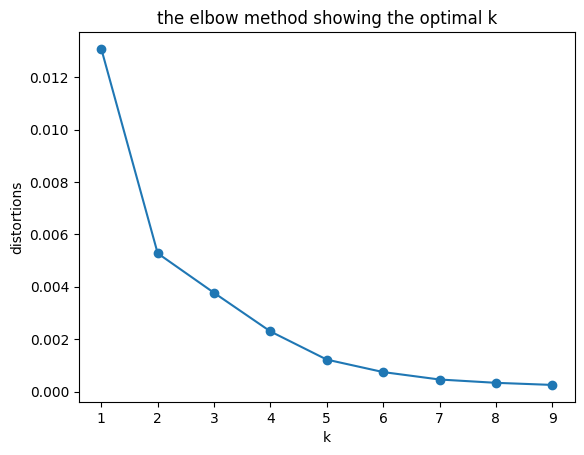

In [ ]:
plt.plot(K, distortions, marker = 'o')
plt.xlabel('k')
plt.ylabel('distortions')
plt.title('the elbow method showing the optimal k')
plt.show()

In [ ]:
silhouette = []

K = range(2, 11)
for k in K:
  labels = KMeans(n_clusters = k, init = 'k-means++').fit(coordinates).labels_
  silhouette.append(metrics.silhouette_score(coordinates, labels, metric = 'euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sil_score = pd.DataFrame({'Cluster' : K, 'Score' : silhouette})
sil_score

,Cluster,Score
0,2,0.483771
1,3,0.504711
2,4,0.484118
3,5,0.516738
4,6,0.513354
5,7,0.522096
6,8,0.479055
7,9,0.455982
8,10,0.428086


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


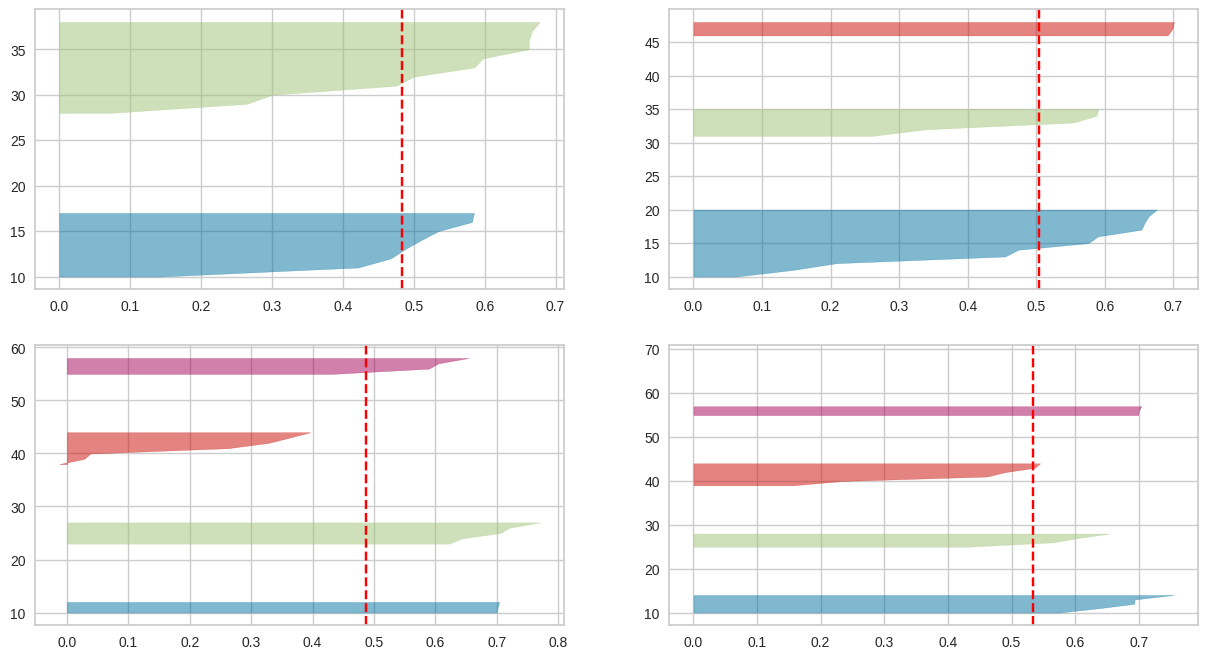

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize = (15, 8))
K = [2, 3, 4, 5]
for k in K:
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  q, mod =divmod(k, 2)
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(coordinates)

In [ ]:
labels = KMeans(n_clusters = 2, init = 'k-means++').fit(coordinates).labels_
print('k = 2', 'silhouette_score', metrics.silhouette_score(coordinates, labels, metric = 'euclidean'))

k = 2 silhouette_score 0.4837711678341517


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
filename_drop['cluster'] = kmeans.predict(filename_drop[['Longitude', 'Latitude']])
filename_drop

<ipython-input-19-96167050002f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filename_drop['cluster'] = kmeans.predict(filename_drop[['Longitude', 'Latitude']])


,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS,cluster
0,3372015.0,RS Umum Daerah Dr. Moewardi Surakarta,A,"Jl. Kol Sutarto 132,Surakarta",-7.558540,110.841899,0271-634634,rsmoewardi@jatengprov.go.id,ICU,NaN,31,0,1
6,3372026.0,RS Umum Dr. Oen,B,"Jl. Brigjend Katamso 55, Surakarta",-7.555617,110.837808,0271-643139,info@droenska.com,ICU,NaN,18,0,1
12,3372096.0,RS Umum PKU Muhammadiyah Surakarta,B,"Jl. Ronggowarsito 130, Surakarta",-7.565419,110.816600,0271-714578,humas_pkusolo@yahoo.co.id,ICU,NaN,11,0,2
18,3372165.0,RS Umum Kasih Ibu,B,"Jl. Slamet Riyadi 404, Surakarta",-7.563000,110.801754,0271-714422,rsukasihibu@yahoo.com,ICU,NaN,12,0,2
24,3372041.0,RS Umum Brayat Minulya,C,Jl. Dr. Setiabudi No. 106 Surakarta,-7.552676,110.814287,0271-716646,rsbmslo@indosat.id,ICU,NaN,4,0,2
30,3372132.0,RS Umum Islam Kustati,C,Jl. Kapt. Mulyadi No.249,-7.580900,110.830900,0271-643013,rsuikustati@yahoo.com,ICU,NaN,7,0,3
35,3372030.0,RS Umum Tk IV Slamet Riyadi Surakarta,C,"Jl. Slamet Riyadi 321, Surakarta",-7.565822,110.805288,0271-714656,rstslametriyadisolo@yahoo.co.id,ICU,NaN,10,0,2
41,3372236.0,RS Umum Hermina Solo,C,JL. Kolonel Sutarto No. 16 Jebres Surakarta,-7.560000,110.840194,0271-638989,solo@herminahospitalgroup.com,ICU,NaN,8,0,1
46,3372052.0,RS Jiwa Daerah Surakarta,A,"Jl. K.H. Dewantoro 80, Jebres, Surakarta",-7.556400,110.863300,0271-641442,rsjd_surakarta@yahoo.com,ICU,NaN,4,0,1
51,3372074.0,RS Umum Panti Waluyo,C,Jl. Jend A Yani No.1,-7.559800,110.791100,0271-712077,rspantiwaluyo@gmail.com,ICU,NaN,4,0,0


In [ ]:
best_rs = filename_drop.sort_values(by=['Tipe', 'BPJS'], ascending = False)
best_rs

,Kode Rumah Sakit,Nama Rumah Sakit,Tipe,Alamat,Latitude,Longitude,Telepon,Email,Kelas,Kamar,Jumlah Bed,BPJS,cluster
62,3372191.0,RS Umum Triharsi,D,"Jl. Monginsidi No.82,Surakarta",-7.557600,110.825000,0271-656903,triharsi.solo@gmail.com,ICU,NaN,4,0,2
68,3372238.0,RS PKU Muhammadiyah Sampangan Surakarta,D,Semanggi RT 002 RW 020 Pasar Kliwon,-7.581668,110.836446,0271-633894,-,ICU,NaN,4,0,3
95,3372201.0,RS Umum Pusat Surakarta,D,"Jl. Profesor Dr. Soeharso No.28, Jajar, Kec. L...",-7.554472,110.787051,0271-720002,rsupsurakarta@kemkes.go.id,ICU,NaN,8,0,0
73,3372239.0,RS Gigi dan Mulut Soelastri,C,Jl. Brigjen Slamet Riyadi No. 366 Surakarta 57141,-7.565111,110.806852,0271-7467796,NaN,ICU,NaN,1,1,2
79,3372241.0,RS JIH Solo,C,Jl. Adi Sucipto No 118 Jajar Laweyan,-7.550400,110.789900,0271-7469100,NaN,ICU,NaN,6,1,0
85,3372242.0,RS Onkologi Solo,C,"Jl. Siwalan No.37 Rt.002 Rw.014 Kerten, Laweya...",-7.556577,110.790503,0271-7651717,NaN,ICU,NaN,3,1,0
24,3372041.0,RS Umum Brayat Minulya,C,Jl. Dr. Setiabudi No. 106 Surakarta,-7.552676,110.814287,0271-716646,rsbmslo@indosat.id,ICU,NaN,4,0,2
30,3372132.0,RS Umum Islam Kustati,C,Jl. Kapt. Mulyadi No.249,-7.580900,110.830900,0271-643013,rsuikustati@yahoo.com,ICU,NaN,7,0,3
35,3372030.0,RS Umum Tk IV Slamet Riyadi Surakarta,C,"Jl. Slamet Riyadi 321, Surakarta",-7.565822,110.805288,0271-714656,rstslametriyadisolo@yahoo.co.id,ICU,NaN,10,0,2
41,3372236.0,RS Umum Hermina Solo,C,JL. Kolonel Sutarto No. 16 Jebres Surakarta,-7.560000,110.840194,0271-638989,solo@herminahospitalgroup.com,ICU,NaN,8,0,1


In [ ]:
def recommended_hospitals(filename_drop, Longitude, Latitude):
  cluster = kmeans.predict(np.array([Longitude, Latitude]). reshape(1, -1))[0]
  print(cluster)
  return filename_drop[filename_drop['cluster']==cluster].iloc[:10][['Nama Rumah Sakit', 'Latitude', 'Longitude']]

In [ ]:
rec_hosp = recommended_hospitals(best_rs, 110.85664241141414, -7.5523142693779475)
rec_hosp

1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,Nama Rumah Sakit,Latitude,Longitude
41,RS Umum Hermina Solo,-7.560000,110.840194
6,RS Umum Dr. Oen,-7.555617,110.837808
0,RS Umum Daerah Dr. Moewardi Surakarta,-7.558540,110.841899
46,RS Jiwa Daerah Surakarta,-7.556400,110.863300


In [ ]:
rec_hosp = recommended_hospitals(best_rs, 110.82712799471938, -7.554579806884118)
rec_hosp

2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,Nama Rumah Sakit,Latitude,Longitude
62,RS Umum Triharsi,-7.557600,110.825000
73,RS Gigi dan Mulut Soelastri,-7.565111,110.806852
24,RS Umum Brayat Minulya,-7.552676,110.814287
35,RS Umum Tk IV Slamet Riyadi Surakarta,-7.565822,110.805288
12,RS Umum PKU Muhammadiyah Surakarta,-7.565419,110.816600
18,RS Umum Kasih Ibu,-7.563000,110.801754
